<a href="https://colab.research.google.com/github/NehaAnalyzes/customer-churn-prediction/blob/main/Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")



In [32]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [33]:
# Convert TotalCharges from object to numeric
# Blank values are converted to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
# CHECK MISSING VALUES
df.isnull().sum()
# -----------------------------
#  HANDLE MISSING VALUES
# -----------------------------
# Drop rows with missing values
df.dropna(inplace=True)
# -----------------------------
# DROP IRRELEVANT COLUMN
# -----------------------------
# customerID is an identifier and has no predictive value
if 'customerID' in df.columns:
    df.drop(columns=['customerID'], inplace=True)

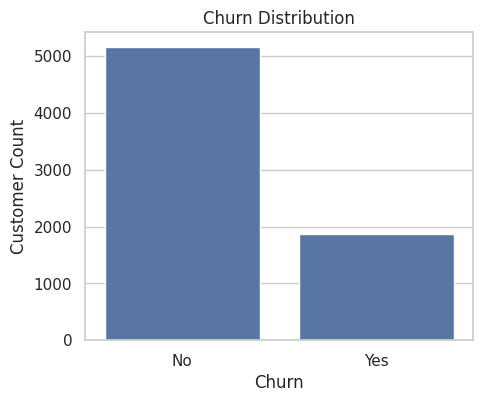

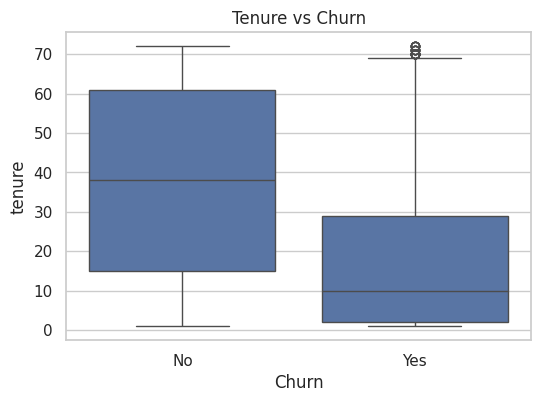

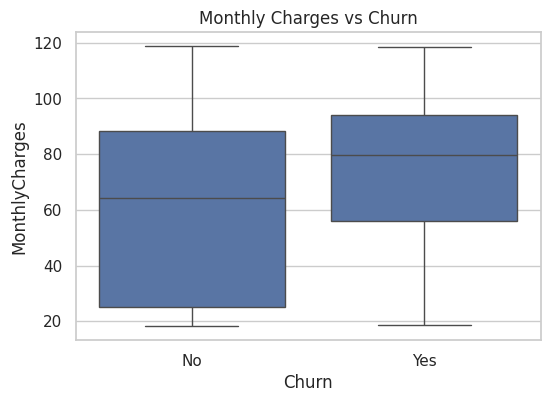

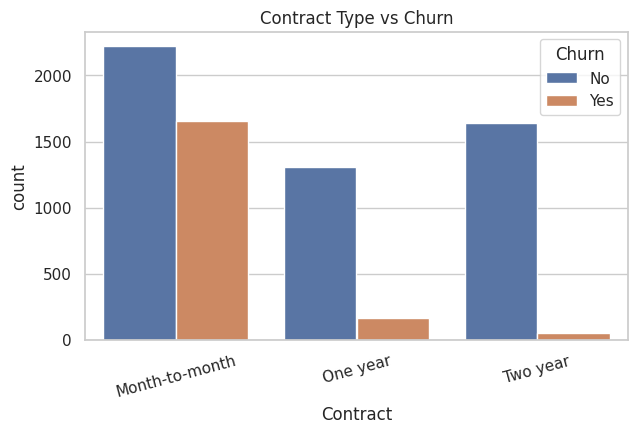

In [34]:

# ============================================================
# EXPLORATORY DATA ANALYSIS (EDA)
# ============================================================
# -----------------------------
#  TARGET VARIABLE ANALYSIS
# -----------------------------

# Plot churn distribution
plt.figure(figsize=(5, 4))
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Customer Count")
plt.show()


# -----------------------------
#  TENURE VS CHURN
# -----------------------------
# Customers with lower tenure are more likely to churn
plt.figure(figsize=(6, 4))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title("Tenure vs Churn")
plt.show()


# -----------------------------
# MONTHLY CHARGES VS CHURN
# -----------------------------
# Higher monthly charges often indicate higher churn risk
plt.figure(figsize=(6, 4))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges vs Churn")
plt.show()


# -----------------------------
# CONTRACT TYPE VS CHURN
# -----------------------------
# Month-to-month contracts usually show higher churn
plt.figure(figsize=(7, 4))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Contract Type vs Churn")
plt.xticks(rotation=15)
plt.show()


# ============================================================
# SAVE CLEANED DATA FOR DAY 2
# ============================================================
df.to_csv("cleaned_telco_churn.csv", index=False)




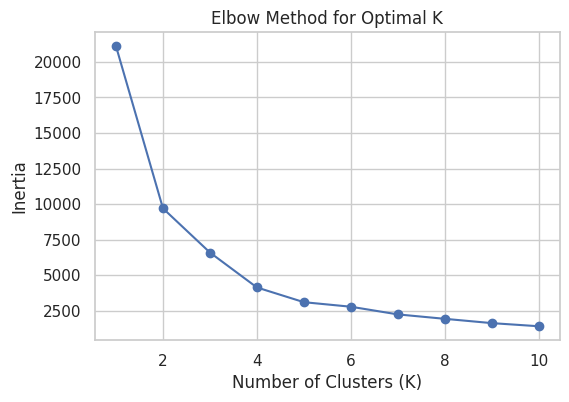

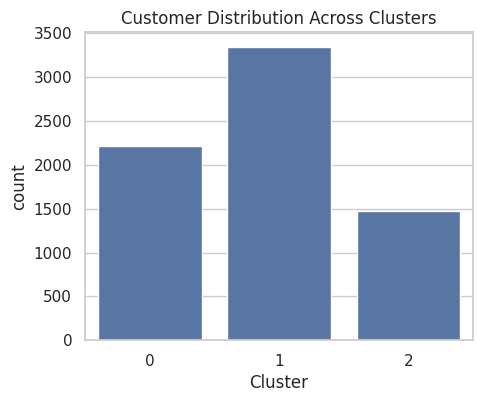

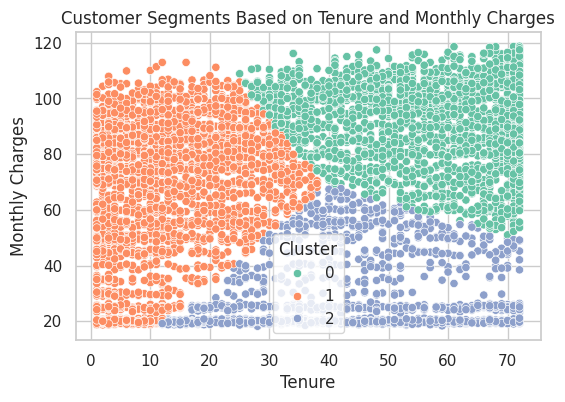

DAY 2 COMPLETED: Customer segmentation done and data saved.


In [22]:
# ============================================================
#CUSTOMER SEGMENTATION USING K-MEANS CLUSTERING
# ============================================================
# -----------------------------
# IMPORT REQUIRED LIBRARIES
# -----------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Set plotting style
sns.set(style="whitegrid")


# -----------------------------
#  LOAD CLEANED DATASET
# -----------------------------
# Load dataset prepared on Day 1
df = pd.read_csv("cleaned_telco_churn.csv")

# Preview data
df.head()

# ============================================================
# FEATURE SELECTION FOR CLUSTERING
# ============================================================
# -----------------------------
# SELECT RELEVANT FEATURES
# -----------------------------

# Select numerical features that represent customer behavior and value
cluster_features = df[
    ['tenure', 'MonthlyCharges', 'TotalCharges']
]

# Check selected features
cluster_features.head()

# ============================================================
# FEATURE SCALING
# ============================================================
# STANDARDIZE FEATURES
# -----------------------------
# Initialize scaler
scaler = StandardScaler()
# Scale features so that all variables contribute equally
scaled_features = scaler.fit_transform(cluster_features)

# ============================================================
# ELBOW METHOD TO DETERMINE OPTIMAL K
# ============================================================
# APPLY ELBOW METHOD
# -----------------------------

inertia = []          # Stores inertia values
K_range = range(1, 11)

# Fit K-Means for different K values
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(6, 4))
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()

# From the elbow curve, we typically select K = 3
# ============================================================
# APPLY K-MEANS CLUSTERING
# ===========================================================
# FIT K-MEANS MODEL
# -----------------------------
# Choose optimal number of clusters
k = 3
# Initialize K-Means
kmeans = KMeans(n_clusters=k, random_state=42)
# Assign cluster labels to each customer
df['Cluster'] = kmeans.fit_predict(scaled_features)
# View cluster assignments
df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Cluster']].head()


# ============================================================
# CLUSTER ANALYSIS & INTERPRETATION
#  CLUSTER SIZE DISTRIBUTION
# -----------------------------

plt.figure(figsize=(5, 4))
sns.countplot(x='Cluster', data=df)
plt.title("Customer Distribution Across Clusters")
plt.show()


# -----------------------------
#  CLUSTER SUMMARY STATISTICS
# -----------------------------
# Mean values of features per cluster
cluster_summary = df.groupby('Cluster')[
    ['tenure', 'MonthlyCharges', 'TotalCharges']
].mean()

cluster_summary


# -----------------------------
# CHURN RATE PER CLUSTER
# -----------------------------
# Calculate churn proportion in each cluster
cluster_churn = (
    df.groupby('Cluster')['Churn']
      .value_counts(normalize=True)
      .unstack()
)

cluster_churn


# ============================================================
# : CLUSTER VISUALIZATION
# ============================================================
#VISUALIZE CLUSTERS (2D VIEW)
# -----------------------------

plt.figure(figsize=(6, 4))
sns.scatterplot(
    x=df['tenure'],
    y=df['MonthlyCharges'],
    hue=df['Cluster'],
    palette='Set2'
)
plt.title("Customer Segments Based on Tenure and Monthly Charges")
plt.xlabel("Tenure")
plt.ylabel("Monthly Charges")
plt.show()


# ============================================================
# SAVE DATA FOR DAY 3
# -----------------------------
# SAVE CLUSTERED DATA
# -----------------------------

df.to_csv("clustered_telco_churn.csv", index=False)

print("DAY 2 COMPLETED: Customer segmentation done and data saved.")


LOGISTIC REGRESSION RESULTS
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.56      0.60       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407

ROC-AUC: 0.8358953983776032

RANDOM FOREST RESULTS
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.50      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

ROC-AUC: 0.8204440625145596


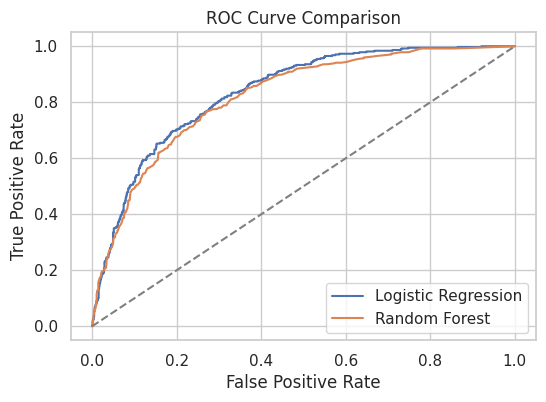

DAY 3 COMPLETED SUCCESSFULLY ✅


In [27]:
# ============================================================
#CUSTOMER CHURN PREDICTION (SUPERVISED LEARNING)
# ============================================================

# -----------------------------
# IMPORT REQUIRED LIBRARIES
# -----------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)

sns.set(style="whitegrid")


# -----------------------------
# LOAD DATASET FROM DAY 2
# -----------------------------
df = pd.read_csv("clustered_telco_churn.csv")
# Preview
df.head()


# ============================================================
# DATA PREPROCESSING
# ============================================================
# -----------------------------
# CLEAN & ENCODE TARGET VARIABLE
# -----------------------------

# Remove leading/trailing spaces if any
df['Churn'] = df['Churn'].astype(str).str.strip()

# Map target variable
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Drop rows where Churn became NaN after mapping
df = df.dropna(subset=['Churn'])


# -----------------------------
# ONE-HOT ENCODE CATEGORICAL FEATURES
# -----------------------------
df_encoded = pd.get_dummies(
    df,
    columns=[
        'gender', 'Partner', 'Dependents', 'PhoneService',
        'MultipleLines', 'InternetService', 'OnlineSecurity',
        'OnlineBackup', 'DeviceProtection', 'TechSupport',
        'StreamingTV', 'StreamingMovies', 'Contract',
        'PaperlessBilling', 'PaymentMethod'
    ],
    drop_first=True
)


# -----------------------------
# FEATURE–TARGET SPLIT
# -----------------------------
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']


# -----------------------------
# TRAIN–TEST SPLIT
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


# -----------------------------
#  FEATURE SCALING (FOR LOGISTIC REGRESSION)
# -----------------------------
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# ============================================================
# MODEL 1: LOGISTIC REGRESSION
# ============================================================

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Predictions
y_pred_lr = log_reg.predict(X_test_scaled)
y_prob_lr = log_reg.predict_proba(X_test_scaled)[:, 1]

print("LOGISTIC REGRESSION RESULTS")
print(classification_report(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_lr))


# ============================================================
# MODEL 2: RANDOM FOREST
# ============================================================

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced'
)

rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

print("\nRANDOM FOREST RESULTS")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))


# ============================================================
# ROC CURVE COMPARISON
# ============================================================

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

plt.figure(figsize=(6, 4))
plt.plot(fpr_lr, tpr_lr, label="Logistic Regression")
plt.plot(fpr_rf, tpr_rf, label="Random Forest")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


# ============================================================
# FEATURE IMPORTANCE (RANDOM FOREST)
# ============================================================
feature_importance = (
    pd.Series(rf.feature_importances_, index=X.columns)
      .sort_values(ascending=False)
)

# Top 10 important features
feature_importance.head(10)

# ============================================================
# SAVE FINAL DATASET
# ============================================================

df_encoded.to_csv("final_telco_churn_ml_ready.csv", index=False)

print("DAY 3 COMPLETED SUCCESSFULLY ✅")


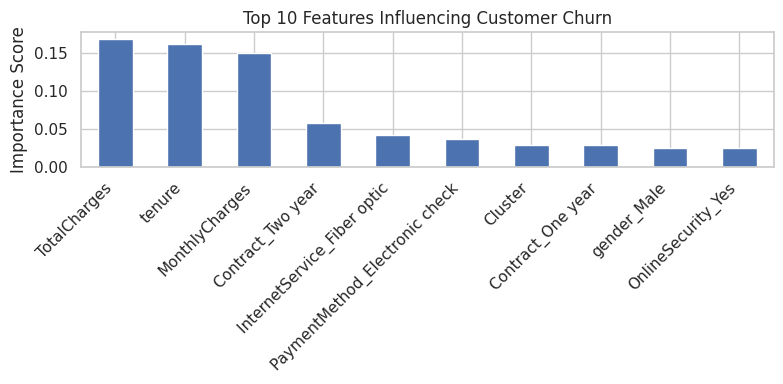

,0
TotalCharges,0.168317
tenure,0.161462
MonthlyCharges,0.150072
Contract_Two year,0.058163
InternetService_Fiber optic,0.042123
PaymentMethod_Electronic check,0.037208
Cluster,0.029171
Contract_One year,0.028732
gender_Male,0.025501
OnlineSecurity_Yes,0.024608


In [28]:
# ============================================================
# FEATURE IMPORTANCE ANALYSIS (RANDOM FOREST)
# ============================================================

importances = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

# Top 10 features
top_features = importances.head(10)

# Plot
plt.figure(figsize=(8, 4))
top_features.plot(kind='bar')
plt.title("Top 10 Features Influencing Customer Churn")
plt.ylabel("Importance Score")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

top_features


In [29]:
# ============================================================
# CHURN RISK SCORING
# ============================================================

# Create a dataframe with probabilities
risk_df = X_test.copy()
risk_df['churn_probability'] = y_prob_lr

# Define risk buckets
def risk_bucket(p):
    if p >= 0.7:
        return "High Risk"
    elif p >= 0.4:
        return "Medium Risk"
    else:
        return "Low Risk"

risk_df['risk_category'] = risk_df['churn_probability'].apply(risk_bucket)

risk_df[['churn_probability', 'risk_category']].head()


,churn_probability,risk_category
971,0.016046,Low Risk
618,0.596455,Medium Risk
4282,0.004679,Low Risk
3715,0.198405,Low Risk
4525,0.103914,Low Risk
